<a href="https://colab.research.google.com/github/HEMANTH200405/leaf-disease-detection/blob/main/LEAF_DISEASE_DETECTION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/plantvillage.zip'
extract_path = '/content/plantvillage'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to", extract_path)


In [ ]:
import os
print(os.listdir('/content/plantvillage'))


['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'PlantVillage', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']


In [ ]:
import os
import shutil
import random

base_path = '/content/plantvillage'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Classes = all folders except train/test and PlantVillage
classes = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f)) and f not in ['train', 'test', 'PlantVillage']]

print(f"Found {len(classes)} classes: {classes}")

test_split = 0.2  # 20% test data

for class_name in classes:
    class_dir = os.path.join(base_path, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    split_idx = int(len(images) * (1 - test_split))
    train_imgs = images[:split_idx]
    test_imgs = images[split_idx:]

    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))

print("✅ Train/Test split completed!")


Found 15 classes: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']
✅ Train/Test split completed!


In [ ]:
import os

print("Train Folders:", os.listdir('/content/plantvillage/train'))
print("Test Folders:", os.listdir('/content/plantvillage/test'))


Train Folders: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']
Test Folders: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']


In [ ]:
import os

# Pick one class name you saw earlier, for example:
class_folder = '/content/plantvillage/Tomato_healthy'
print("Files inside Tomato_healthy:", os.listdir(class_folder)[:10])


Files inside Tomato_healthy: ['bb8b0b14-a5f5-4c11-887f-71aed1864d84___GH_HL Leaf 409.1.JPG', 'ce303601-b655-483c-9778-3cbd317606be___RS_HL 0163.JPG', '083426c2-0042-4788-91ea-b7d93395c24a___RS_HL 9929.JPG', 'c41aefc3-843c-49c9-8c8f-15c0e1dbc507___RS_HL 9857.JPG', 'd88b90c0-2850-425d-af82-7bfb0f6a9dd4___GH_HL Leaf 361.JPG', '6aed746b-e45b-40d6-addb-71bdd0456618___RS_HL 0638.JPG', '5f3f3da8-de1a-4cd8-af68-6801c9327834___RS_HL 9755.JPG', '7de93009-6180-4027-8779-76947cda3e2f___2700323949_95aa2eaa01_o.jpg', '674f82cb-c61c-4944-b8d6-1afb6212f96f___RS_HL 9646.JPG', 'e7ca6603-d0c1-4bad-bc53-a45cfebb156f___GH_HL Leaf 355.1.JPG']


In [ ]:
import os

print("Top level after extraction:", os.listdir('/content/plantvillage'))


Top level after extraction: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'test', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'PlantVillage', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy', 'train']


In [ ]:
for item in os.listdir('/content/plantvillage'):
    print(item)


Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Late_blight
Tomato_Bacterial_spot
PlantVillage
Potato___healthy
Potato___Late_blight
Tomato_Septoria_leaf_spot
Tomato_Early_blight
Tomato_healthy
Pepper__bell___Bacterial_spot
test
Tomato__Target_Spot
Pepper__bell___healthy
Potato___Early_blight
Tomato__Tomato_mosaic_virus
Tomato_Leaf_Mold
train


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/plantvillage.zip'  # Make sure path is correct
extract_path = '/content/plantvillage'

# Clean previous extraction
!rm -rf /content/plantvillage
os.makedirs(extract_path, exist_ok=True)

# Extract again
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Re-extracted dataset")
print("Folders inside:", os.listdir(extract_path))


✅ Re-extracted dataset
Folders inside: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'PlantVillage', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']


In [ ]:
for item in os.listdir(extract_path):
    print(item)


Tomato_Leaf_Mold
Potato___Late_blight
Tomato__Target_Spot
Tomato_Septoria_leaf_spot
Pepper__bell___healthy
Potato___Early_blight
Tomato_Late_blight
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
Pepper__bell___Bacterial_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_healthy
PlantVillage
Tomato_Early_blight
Tomato_Bacterial_spot
Potato___healthy


In [ ]:
import os, pathlib

root = pathlib.Path('/content/plantvillage')
print("Top-level items under /content/plantvillage:")
for p in root.iterdir():
    print(" -", p.name, "(dir)" if p.is_dir() else "(file)")


Top-level items under /content/plantvillage:
 - Tomato_Leaf_Mold (dir)
 - Potato___Late_blight (dir)
 - Tomato__Target_Spot (dir)
 - Tomato_Septoria_leaf_spot (dir)
 - Pepper__bell___healthy (dir)
 - Potato___Early_blight (dir)
 - Tomato_Late_blight (dir)
 - Tomato__Tomato_mosaic_virus (dir)
 - Tomato__Tomato_YellowLeaf__Curl_Virus (dir)
 - Pepper__bell___Bacterial_spot (dir)
 - Tomato_Spider_mites_Two_spotted_spider_mite (dir)
 - Tomato_healthy (dir)
 - PlantVillage (dir)
 - Tomato_Early_blight (dir)
 - Tomato_Bacterial_spot (dir)
 - Potato___healthy (dir)


In [ ]:
import os, pathlib

root = pathlib.Path('/content/plantvillage')
img_exts = {'.jpg', '.jpeg', '.png'}

class_dirs = []
for p in root.rglob('*'):
    if p.is_dir():
        imgs = [f for f in p.iterdir() if f.is_file() and f.suffix.lower() in img_exts]
        if imgs:
            class_dirs.append((p, len(imgs)))

print(f"Found {len(class_dirs)} folders that contain images.\n")
for p, n in class_dirs[:20]:  # show first 20
    print(f"{n:5d} imgs  -> {p}")

print("\n(Showing first 20; total:", len(class_dirs), "candidate class folders.)")


Found 30 folders that contain images.

  952 imgs  -> /content/plantvillage/Tomato_Leaf_Mold
 1000 imgs  -> /content/plantvillage/Potato___Late_blight
 1404 imgs  -> /content/plantvillage/Tomato__Target_Spot
 1771 imgs  -> /content/plantvillage/Tomato_Septoria_leaf_spot
 1478 imgs  -> /content/plantvillage/Pepper__bell___healthy
 1000 imgs  -> /content/plantvillage/Potato___Early_blight
 1909 imgs  -> /content/plantvillage/Tomato_Late_blight
  373 imgs  -> /content/plantvillage/Tomato__Tomato_mosaic_virus
 3208 imgs  -> /content/plantvillage/Tomato__Tomato_YellowLeaf__Curl_Virus
  997 imgs  -> /content/plantvillage/Pepper__bell___Bacterial_spot
 1676 imgs  -> /content/plantvillage/Tomato_Spider_mites_Two_spotted_spider_mite
 1591 imgs  -> /content/plantvillage/Tomato_healthy
 1000 imgs  -> /content/plantvillage/Tomato_Early_blight
 2127 imgs  -> /content/plantvillage/Tomato_Bacterial_spot
  152 imgs  -> /content/plantvillage/Potato___healthy
  952 imgs  -> /content/plantvillage/PlantVi

In [ ]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [ ]:
import os
import shutil
import random

# Original dataset
original_path = '/content/plantvillage'

# New prepared dataset
prepared_path = '/content/plantvillage_prepared'
train_path = os.path.join(prepared_path, 'train')
test_path = os.path.join(prepared_path, 'test')

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# All class folders (excluding train/test and PlantVillage if present)
classes = [f for f in os.listdir(original_path) if os.path.isdir(os.path.join(original_path, f)) and f not in ['train', 'test', 'PlantVillage']]

print(f"Found {len(classes)} classes:", classes)

test_split = 0.2  # 20% for testing

for class_name in classes:
    class_dir = os.path.join(original_path, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    split_idx = int(len(images) * (1 - test_split))
    train_imgs = images[:split_idx]
    test_imgs = images[split_idx:]

    # Create class folders in train/test
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

    # Copy images
    for img in train_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))

print("✅ Train/Test split completed in /content/plantvillage_prepared")


Found 15 classes: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']
✅ Train/Test split completed in /content/plantvillage_prepared


In [ ]:
print("Train classes:", os.listdir(train_path))
print("Test classes:", os.listdir(test_path))


Train classes: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']
Test classes: ['Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Potato___healthy']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
train_dir = '/content/plantvillage_prepared/train'
test_dir = '/content/plantvillage_prepared/test'

IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 15


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Number of classes:", train_generator.num_classes)


Found 16504 images belonging to 15 classes.
Found 4134 images belonging to 15 classes.
Number of classes: 15


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 675s 1s/step - accuracy: 0.2574 - loss: 2.2839 - val_accuracy: 0.6447 - val_loss: 1.0754
Epoch 2/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.5562 - loss: 1.3744 - val_accuracy: 0.6495 - val_loss: 1.0254
Epoch 3/15
516/516 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.6203 - loss: 1.1400 - val_accuracy: 0.6679 - val_loss: 0.9741
Epoch 4/15
280/516 ━━━━━━━━━━━━━━━━━━━━ 4:44 1s/step - accuracy: 0.6528 - loss: 0.9974

In [ ]:
model.save('/content/drive/MyDrive/leaf_disease_final_model.h5')
print("✅ Model saved as leaf_disease_final_model.h5 in Google Drive!")


✅ Model saved as leaf_disease_final_model.h5 in Google Drive!


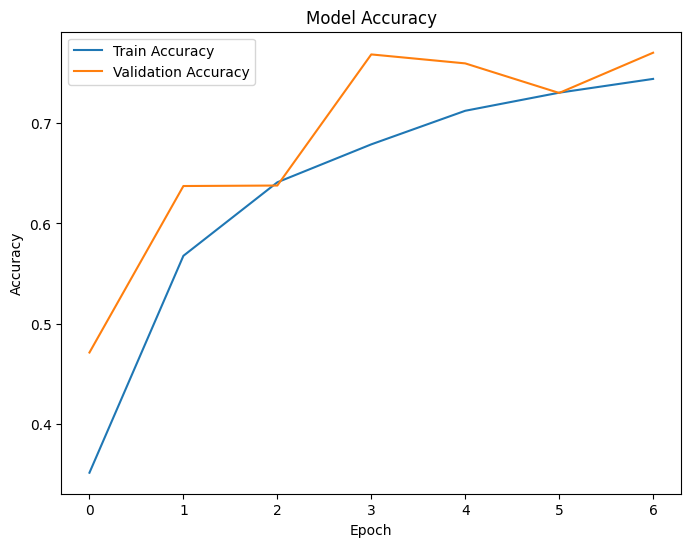

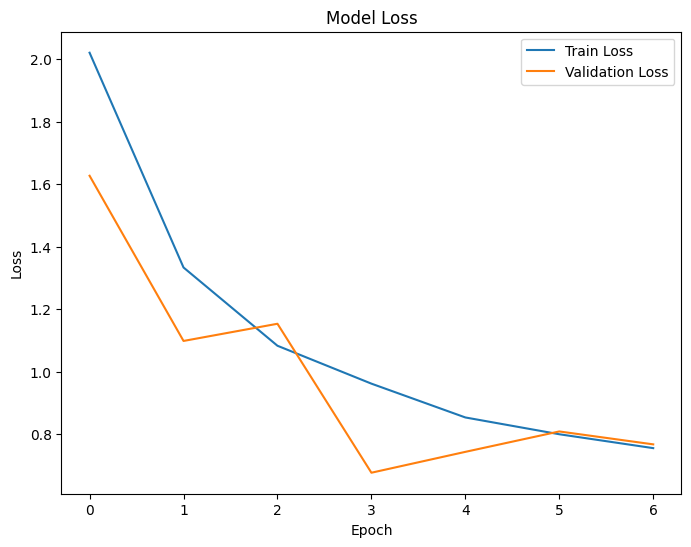

Upload an image for prediction:


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# --- Accuracy Graph ---
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Loss Graph ---
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Prediction Test ---
print("Upload an image for prediction:")
class_names = list(train_generator.class_indices.keys())
uploaded = files.upload()

for filename in uploaded.keys():
    img = image.load_img(filename, target_size=(128, 128))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    print(f"Predicted Class: {predicted_class} ({confidence:.2f}%)")
